Methods of Machine Learning and Intellectual Analysis of Data (Learning course) \
Bohdan Pavlyshenko (https://www.linkedin.com/in/bpavlyshenko/) \
Youtube video: https://www.youtube.com/watch?v=6OHAAysqoEU&list=PLMQt7tnruMvF1jetHNUKjMtHKSp78H2bb&index=9

# Linear Regression (Rossmann Store Sales)

Used resource:\
https://www.kaggle.com/c/rossmann-store-sales

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV,Lasso, LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
train_df=pd.read_csv('data/rossm_train_df.csv')
test_df=pd.read_csv('data/rossm_test_df.csv')
train_df.Date=pd.to_datetime(train_df.Date)
test_df.Date=pd.to_datetime(test_df.Date)

In [3]:
numerical_features = [ 'Open','Promo','SchoolHoliday', 'logMonthSales', 'CompetitionDistance']
categorical_features = ['weekday', 'month']
target = 'logSales'

In [4]:
train_df.head()

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,weekday,monthday,month,year,logSales,monthSales,logMonthSales
0,1,2014-12-31,2605,327,1.0,0.0,0,1.0,c,a,1270.0,2,31,12,2014,7.865572,119898.516129,11.694409
1,23,2014-12-31,3489,290,1.0,0.0,0,1.0,d,a,4060.0,2,31,12,2014,8.157657,138719.322581,11.840215
2,27,2014-12-31,5385,599,1.0,0.0,0,1.0,a,a,60.0,2,31,12,2014,8.591558,238187.387097,12.380817
3,38,2014-12-31,3534,340,1.0,0.0,0,1.0,d,a,1090.0,2,31,12,2014,8.170469,150890.870968,11.924319
4,42,2014-12-31,7395,780,1.0,0.0,0,1.0,a,c,290.0,2,31,12,2014,8.908695,255766.709677,12.452025


In [5]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_enc=enc.fit_transform(train_df[categorical_features])
test_enc=enc.transform(test_df[categorical_features])

In [6]:
train_enc[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]])

In [7]:
categorical_feat_enc=enc.get_feature_names_out(categorical_features)
categorical_feat_enc

array(['weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'], dtype=object)

In [8]:
train_enc_df=pd.DataFrame(train_enc,columns=categorical_feat_enc)
test_enc_df=pd.DataFrame(test_enc,columns=categorical_feat_enc)
X_train_df=pd.concat([train_df[numerical_features], train_enc_df], axis=1)
X_test_df=pd.concat([test_df[numerical_features], test_enc_df], axis=1, ignore_index=True)

In [9]:
features=numerical_features+list(categorical_feat_enc)

In [10]:
X_train = X_train_df.values
X_test = X_test_df.values
y_train = train_df[target].values
y_test = test_df[target].values

In [11]:
X_train.shape

(73000, 24)

In [12]:
regr=LinearRegression()
_=regr.fit(X_train,y_train)
train_df['pred_lr']=regr.predict(X_train)
test_df['pred_lr']=regr.predict(X_test)
train_rmse_lr=np.round(mean_squared_error(train_df[target], train_df['pred_lr'], squared=False),3)
test_rmse_lr=np.round(mean_squared_error(test_df[target], test_df['pred_lr'], squared=False),3)
print(f'Linear Regression - RMSE train: {train_rmse_lr}, RMSE test: {test_rmse_lr}')

Linear Regression - RMSE train: 0.229, RMSE test: 0.217


In [13]:
scaler = StandardScaler()
X_train_st=scaler.fit_transform(X_train)
X_test_st=scaler.transform(X_test)

In [36]:
regr=Lasso(alpha=0.01)
_=regr.fit(X_train_st,y_train)
train_df['pred_lasso']=regr.predict(X_train_st)
test_df['pred_lasso']=regr.predict(X_test_st)
train_rmse_lasso=np.round(mean_squared_error(train_df[target], train_df['pred_lasso'], squared=False),3)
test_rmse_lasso=np.round(mean_squared_error(test_df[target], test_df['pred_lasso'], squared=False),3)
print(f'LASSO Regression - RMSE train: {train_rmse_lasso}, RMSE test: {test_rmse_lasso}')

LASSO Regression - RMSE train: 0.232, RMSE test: 0.221


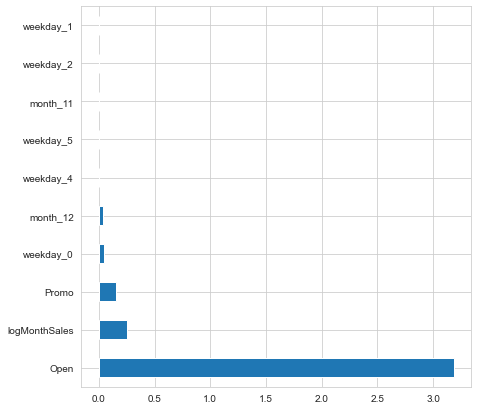

In [37]:
lasso_coef=pd.DataFrame({'coef':regr.coef_},index=features)
lasso_coef['coef_abs']=np.abs(lasso_coef['coef'])
lasso_coef.sort_values('coef_abs',ascending=False, inplace=True)
lasso_coef=lasso_coef[lasso_coef.coef!=0]
_=lasso_coef.iloc[:25].coef.plot(kind='barh',figsize=(7,7))

In [32]:
lasso_coef.shape

(21, 2)

In [144]:
X_train_st.shape

(73000, 24)

In [38]:
lasso_coef

,coef,coef_abs
Open,3.184437,3.184437
logMonthSales,0.249980,0.249980
Promo,0.152221,0.152221
weekday_0,0.043961,0.043961
month_12,0.040804,0.040804
weekday_4,0.004673,0.004673
weekday_5,-0.002034,0.002034
month_11,0.001901,0.001901
weekday_2,-0.001054,0.001054
weekday_1,0.000978,0.000978
